In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

from azureml.core import Workspace, Dataset

# Loading the Azure Machine Learning Workspace
workspace = Workspace.from_config()

# Retrieving the dataset by its name 
dataset = Dataset.get_by_name(workspace, name='SentimentAnalysis')

# Loading the dataset into a Pandas DataFrame
df = dataset.to_pandas_dataframe()

# Now 'df' contains the sentiment analysis dataset as a Pandas DataFrame

In [2]:
df.head()

,commit,author,date,message,repo
0,692bba578efb5e305c9b116568e5aad75b3fdbb3,Mortada Mehyar <mortada@users.noreply.github.com>,Wed Apr 21 12:27:07 2021 +0800,DOC: add example for plotting asymmetrical err...,pandas-dev/pandas
1,855696cde0ef5d80a7d4bd3f6a2940c5a2fecb3f,Patrick Hoefler <61934744+phofl@users.noreply....,Wed Apr 21 01:23:07 2021 +0200,Add keyword sort to pivot_table (#40954),pandas-dev/pandas
2,eaaefd140289a5103679ac6748567f724c7be56a,attack68 <24256554+attack68@users.noreply.gith...,Wed Apr 21 01:21:22 2021 +0200,ENH: `Styler.highlight_quantile` method (#40926),pandas-dev/pandas
3,aab87997058f3c74ba70286620ebe792ee4ef169,attack68 <24256554+attack68@users.noreply.gith...,Wed Apr 21 01:01:03 2021 +0200,ENH: add `decimal` and `thousands` args to `St...,pandas-dev/pandas
4,9c43cd7675d96174051e470de1f45e2bf7c9ebdc,Simon Hawkins <simonjayhawkins@gmail.com>,Tue Apr 20 23:58:18 2021 +0100,[ArrowStringArray] Use utf8_upper and utf8_low...,pandas-dev/pandas


In [3]:
df.describe()

,commit,author,date,message,repo
count,4336299,4336299,4336299,4335970,4336299
unique,4336299,89436,4268305,4217716,34
top,692bba578efb5e305c9b116568e5aad75b3fdbb3,chromium-autoroll <chromium-autoroll@skia-publ...,Wed Nov 1 03:56:19 2017 +1000,Merge remote-tracking branch 'origin/master' i...,torvalds/linux
freq,1,36339,137,12753,998326


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.tail()

,commit,author,date,message,repo
4336294,43a17862477d0b2b7fb825ffd2a00ac193d2f771,Johannes Rieken <johannes.rieken@gmail.com>,2015-11-13 16:36:52+01:00,jsdoc fot vscode.d.ts,microsoft/vscode
4336295,e3281e77cb1b684787971fef7985002583ec843a,Johannes Rieken <johannes.rieken@gmail.com>,2015-11-13 15:18:17+01:00,remove commented extension reference,microsoft/vscode
4336296,0a2f0cbc5c7ebc4573ba93c7b4c007efb1110856,Benjamin Pasero <benjpas@microsoft.com>,2015-11-13 16:32:42+01:00,gulp-symdest does not preserve links on electr...,microsoft/vscode
4336297,6f9e2ae3907632e2f7dbbabe8da403edd6dfa120,Chris Dias <chris@diasfam.com>,2015-11-13 15:48:38+01:00,"Add reference to DefinitelyTyped, updated the ...",microsoft/vscode
4336298,8f35cc4768393b25468416829e980d7550619fb1,Erich Gamma <egamma@microsoft.com>,2015-11-13 14:39:38+01:00,Hello Code,microsoft/vscode


In [6]:
df['date'] = pd.to_datetime(df['date'], utc=True)


In [7]:
df.dtypes

commit                  object
author                  object
date       datetime64[ns, UTC]
message                 object
repo                    object
dtype: object

In [8]:
df.head()

,commit,author,date,message,repo
0,692bba578efb5e305c9b116568e5aad75b3fdbb3,Mortada Mehyar <mortada@users.noreply.github.com>,2021-04-21 04:27:07+00:00,DOC: add example for plotting asymmetrical err...,pandas-dev/pandas
1,855696cde0ef5d80a7d4bd3f6a2940c5a2fecb3f,Patrick Hoefler <61934744+phofl@users.noreply....,2021-04-20 23:23:07+00:00,Add keyword sort to pivot_table (#40954),pandas-dev/pandas
2,eaaefd140289a5103679ac6748567f724c7be56a,attack68 <24256554+attack68@users.noreply.gith...,2021-04-20 23:21:22+00:00,ENH: `Styler.highlight_quantile` method (#40926),pandas-dev/pandas
3,aab87997058f3c74ba70286620ebe792ee4ef169,attack68 <24256554+attack68@users.noreply.gith...,2021-04-20 23:01:03+00:00,ENH: add `decimal` and `thousands` args to `St...,pandas-dev/pandas
4,9c43cd7675d96174051e470de1f45e2bf7c9ebdc,Simon Hawkins <simonjayhawkins@gmail.com>,2021-04-20 22:58:18+00:00,[ArrowStringArray] Use utf8_upper and utf8_low...,pandas-dev/pandas


### Commit Frequency Over Time:
### 
Analyzing the distribution of commit messages over time. We created a time series visualizations to see how the commit frequency changes over days, weeks, or months. This can help identify busy periods or trends in development activity.

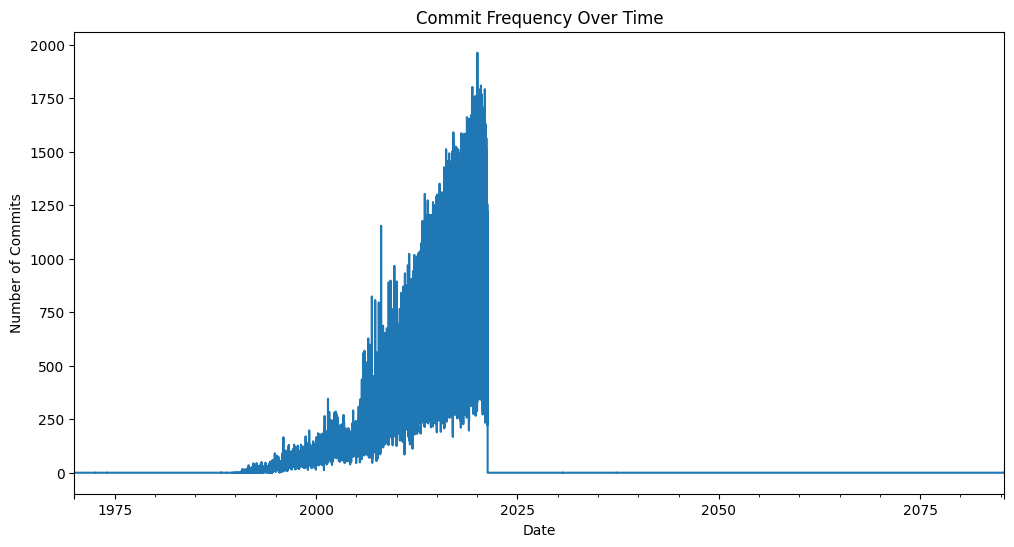

In [9]:


column_name = 'date'

# Setting 'date' column as the index for time series plotting
df.set_index(column_name, inplace=True)

# Resampling the data by day and count the number of commits for each day
commit_counts = df.resample('D').size()

# Plotting the commit frequency over time
plt.figure(figsize=(12, 6))
commit_counts.plot(title='Commit Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Commits')
plt.show()


### Author Contributions:
### 
We want to identify the top contributors by analyzing the number of commits made by each author. 

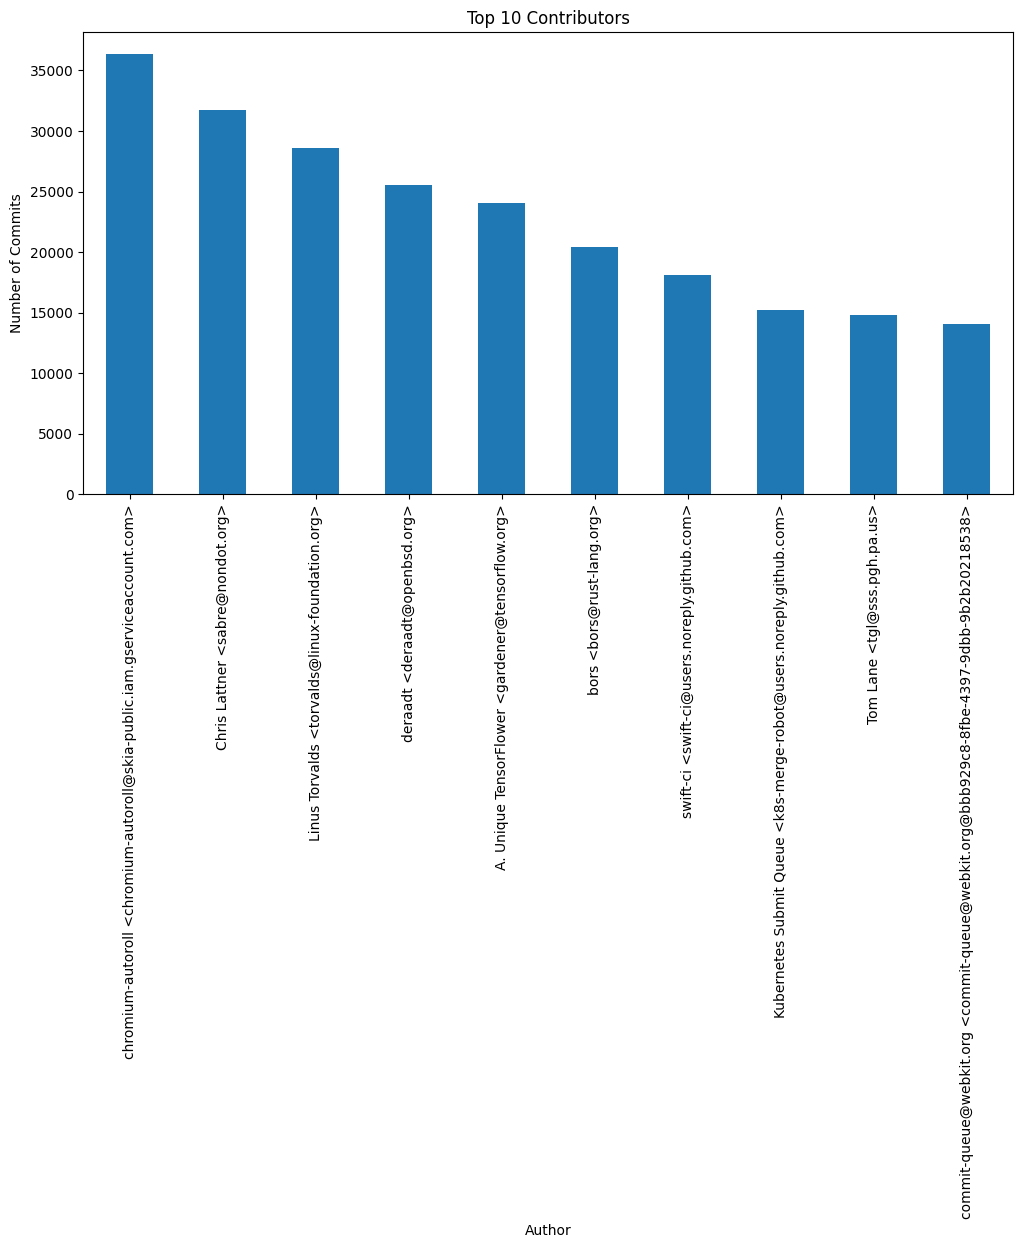

In [10]:
author_column = 'author'

# Step 1: Counting the number of commits for each author
author_commit_counts = df[author_column].value_counts()

# Step 2: Plotting the top contributors
plt.figure(figsize=(12, 6))
author_commit_counts.head(10).plot(kind='bar', title='Top 10 Contributors')
plt.xlabel('Author')
plt.ylabel('Number of Commits')
plt.show()


In [11]:
%pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [12]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


commit_message_column = 'message'

# Downloading VADER lexicon 
nltk.download('vader_lexicon')

# Initializing the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Step 1: Analyzing sentiment and creating a new column 'sentiment_score' in the DataFrame
df['sentiment_score'] = df[commit_message_column].apply(lambda x: sid.polarity_scores(str(x))['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
'''

# Step 2: Grouping the data by year-month and calculate the average sentiment score
sentiment_over_time = df.groupby(df['date'].dt.to_period("M"))['sentiment_score'].mean()

# Step 3: Plotting the sentiment trends over time
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(title='Average Sentiment Over Time', marker='o', linewidth=2)
plt.xlabel('Year-Month')
plt.ylabel('Average Sentiment Score')
plt.show()
'''

In [ ]:
df.head()

We'll visualize the sentiment distribution, explore how sentiment varies across different authors, and investigate sentiment trends specific to different repositories.

This code creates a histogram to show the distribution of sentiment scores in commit messages.

In [ ]:
import seaborn as sns


sns.set(style="whitegrid")

# Visualize Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


This code uses a boxplot to visualize the distribution of sentiment scores for each author, providing insights into how sentiment varies across different contributors.

In [ ]:
# Author-Specific Sentiment
plt.figure(figsize=(14, 8))
sns.boxplot(x='author', y='sentiment_score', data=df, palette='viridis')
plt.title('Author-Specific Sentiment Analysis')
plt.xlabel('Author')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.show()


This code creates a boxplot to analyze how sentiment scores vary across different repositories, helping us understand the emotional tone associated with each project.

In [ ]:
# Repository-Specific Sentiment
plt.figure(figsize=(14, 8))
sns.boxplot(x='repository_name', y='sentiment_score', data=df, palette='muted')
plt.title('Repository-Specific Sentiment Analysis')
plt.xlabel('Repository')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.show()
